In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from glob import glob

In [ ]:
image_path='/content/drive/MyDrive/Multi model search/train_images'
images=glob(image_path+'/*')

In [ ]:
len(images)

22023

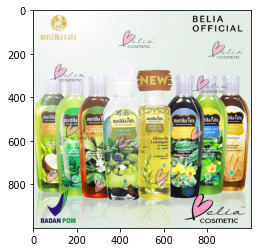

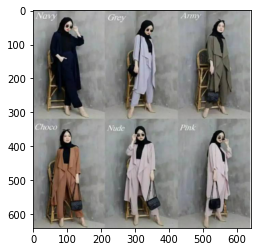

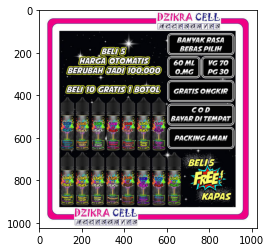

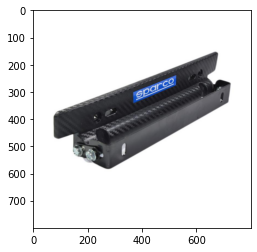

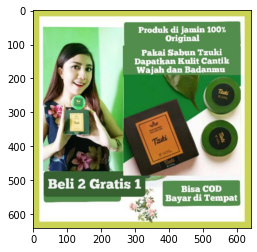

In [ ]:
for i in range(5):
    img=images[i]
    x=plt.imread(img)
    plt.imshow(x)
    plt.show()
    

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Multi model search/train.csv')
train.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [ ]:
images[1]

'/content/drive/MyDrive/Multi model search/train_images/a683477c2dabbc4e27e33d96d39dac51.jpg'

In [ ]:
images[1].split('/')[-1]

'a683477c2dabbc4e27e33d96d39dac51.jpg'

In [ ]:
train['image'][1]

'00039780dfc94d01db8676fe789ecd05.jpg'

In [ ]:
image_name=[]
for i in range(len(images)):
    image_name.append(images[i].split('/')[-1])

  

In [ ]:
list1=set(image_name)
list2=set(list(train['image']))
commom_images=list1&list2

In [ ]:
len(commom_images)

21962

In [ ]:
len(images)

22023

In [ ]:
commom_images=list(commom_images)
len(commom_images)

21962

In [ ]:
#commom_images=[]
#for i in range(len(train['image'])):
    ##for j in range(len(images)):
        ##if images[j].split('/')[-1]==train['image'][i]:
          #  commom_images.append(images[j].split('/')[-1])

In [ ]:
import pickle
try:
   geeky_file = open('COMMON_IMAGES', 'wb')
   pickle.dump(commom_images, geeky_file)
   geeky_file.close()#
  
except:
    print("Something went wrong")
#loading of the pickle file 

In [ ]:
file = open('/content/drive/MyDrive/Multi model search/COMMON_IMAGES','rb')
images_data = pickle.load(file)  
print(type(images_data))
print(len(images_data))

<class 'list'>
23241


In [ ]:
len(images_data)

23241

In [ ]:
train[train['posting_id']=='train_2678176944']

,posting_id,image,image_phash,title,label_group
16118,train_2678176944,797193919063e901f21ed793e444dbe4.jpg,bf63c0c6859885db,Chil Mil Reguler 800gr,4189236082


In [ ]:
images_title= dict(zip(train.posting_id, train.title))
train.loc[train['image'] ==train['image'][5] , 'title'].iloc[0]

'CELANA WANITA  (BB 45-84 KG)Harem wanita (bisa cod)'

In [ ]:
images_title= dict(zip(train.image, train.title))

In [ ]:
train.loc[train['image'] ==train['image'][5] , 'title'].iloc[0]

'CELANA WANITA  (BB 45-84 KG)Harem wanita (bisa cod)'

In [ ]:
# Dictionary of images and there corresponding texts
image_text={}

#for k in images_data:
  #  for i in range(len(train['image'])):
 ##       if k==train['image'][i]:
 #           image_text[k]=images_title[k]



    

In [ ]:
import pickle
try:
   geeky_file = open('images_and_text', 'wb')
   pickle.dump(image_text, geeky_file)
   geeky_file.close()#
  
except:
    print("Something went wrong")
#loading of the pickle file 

In [ ]:
file = open('/content/drive/MyDrive/Multi model search/images_and_text','rb')
images_text= pickle.load(file) 



In [ ]:
len(images_text)

21962

## Converting images to feature vectors

we will use MobileNet for this Task

In [ ]:
import tensorflow
from tensorflow.keras.models import Model,load_model
from keras.applications.resnet50 import ResNet50,preprocess_input
from keras.preprocessing import image
model=ResNet50( weights='imagenet',input_shape=(224,224,3))

In [ ]:
model_new=Model(model.input,model.layers[-2].output)

In [ ]:
model_new.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
def image_preprocessed(input):
    img=image.load_img(input,target_size=(224,224,3))
    img=image.img_to_array(img)
    
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    return img
# Extract features from the Images
def feature_extractor(input):
    img=image_preprocessed(input)
    feature_vector=model_new.predict(img)
    feature_vector=feature_vector.reshape(feature_vector.shape[1],)
    return feature_vector    

In [ ]:
len(images_data)

23241

In [ ]:
print(feature_extractor('/content/drive/MyDrive/Multi model search/train_images/a683477c2dabbc4e27e33d96d39dac51.jpg'))

[0.74624103 3.970156   0.11807213 ... 1.2203546  0.89293617 1.1608542 ]


In [ ]:
file = open('/content/drive/MyDrive/Multi model search/images_encodings','rb')
images_data = pickle.load(file) 


In [ ]:
!pip install transformers

In [ ]:
! pip install sentence_transformers

In [ ]:
print(len(images_data))

21962


In [ ]:
len(images_text)

21962

In [ ]:
from sentence_transformers import SentenceTransformer
#model = SentenceTransformer('paraphrase-distilroberta-base-v1')

#Our sentences we like to encode
#sentence_embeddings={}
#Sentences are encoded by calling model.encode()
#for i in range(len(list(images_text.keys()))):

    # embeddings = model.encode(images_text[(list(images_text.keys())[i])])
    # sentence_embeddings[(list(images_text.keys())[i])]=embeddings
     ##if i%1000==0:
        # print('Number of embiddings converted are {}'.format(i))



In [ ]:
import pickle
try:
   geeky_file = open('sentence_embeddings', 'wb')
   pickle.dump(sentence_embeddings, geeky_file)
   geeky_file.close()

except:      

    print("Something went wrong")    
#loading of the pickle file    


Something went wrong


In [ ]:
file = open('/content/drive/MyDrive/Multi model search/sentence_embeddings','rb')
text_embeddings = pickle.load(file) 

In [ ]:
len(text_embeddings['08353952d991b48bcde9cbca79d808f9.jpg'])

768

In [ ]:
print(list(text_embeddings.keys())[0])

0000a68812bc7e98c42888dfb1c07da0.jpg


In [ ]:
print(list(images_data.keys())[0])

0000a68812bc7e98c42888dfb1c07da0.jpg


### Combining the images features and text embeddings

In [ ]:
import numpy as np
def concatenate_fun(image_feature,text_embeddings):
    con_img=np.concatenate((image_feature,text_embeddings),axis=0)
    norm=np.linalg.norm(con_img)
    normal_con_img=con_img/norm
    return normal_con_img

In [ ]:
print(len(concatenate_fun(images_data[(list(images_data.keys())[0])],text_embeddings[(list(text_embeddings.keys())[0])])))

2816


In [ ]:
con_img_list=[] 
index_images={}
for i in range(len(images_data)):
    index_images[list(images_data.keys())[i]]=i
    x=concatenate_fun(images_data[(list(images_data.keys())[i])],text_embeddings[(list(text_embeddings.keys())[i])])
    con_img_list.append(x)


In [ ]:
print(len(con_img_list))
print(len(con_img_list[0]))

21962
2816


In [ ]:
from sklearn.neighbors import NearestNeighbors

# set desired number of neighbors
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(con_img_list)
# select indices of k nearest neighbors of the vectors in the input list
#neighbors = neigh.kneighbors([xq], return_distance = False)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
index_images['797193919063e901f21ed793e444dbe4.jpg']

15236

In [ ]:
testing=con_img_list[15236]
testing

array([ 0.00164622,  0.00051397,  0.00222117, ...,  0.01441151,
       -0.00133262,  0.01777873], dtype=float32)

In [ ]:
neighbor_distance,neighbor_index = neigh.kneighbors([testing], return_distance = True)

In [ ]:
print(neighbor_distance)

[[0.         0.31528118 0.36506149 0.38036388 0.4230569 ]]


In [ ]:
print(neighbor_index)

[[15236 11556 12042 15603 11259]]


In [ ]:
# function to return key for any value
def get_key(val):
    for key, value in index_images.items():
         if val == value:
             return key
 

In [ ]:
nearest_images=[]
for i in range(5):
    nearest_images.append(get_key(neighbor_index[0][i]))




In [ ]:
images_text['0842631d1fa7e192ffb73c5255936fdd.jpg'] 


'PIXY UV Whitening Two Way Cake Perfect Last | REFILL'

In [ ]:
nearest_images

['797193919063e901f21ed793e444dbe4.jpg',
 '5be80af2392197b702aa17733904d3f0.jpg',
 '5fc4b5dbc5d5d0c41da424ebf62e3c45.jpg',
 '7c3ae07af2457055b0d6be18de5d133c.jpg',
 '599f32d983bddfc5183d97b68f1c170f.jpg']

### Showing nearest images and texts

Original image and text ====
Chil Mil Reguler 800gr


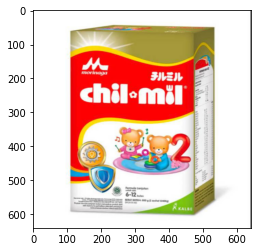

Nearest images and text related the given images are ===================
Chil Mil Reguler 800gr


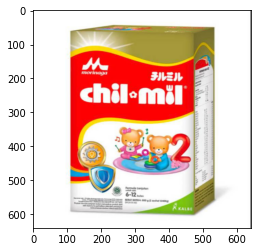

Nearest images and text related the given images are ===================
CHILMIL Reguler Box 800gr


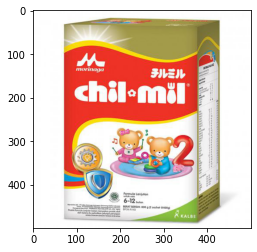

Nearest images and text related the given images are ===================
Morinaga Chil Mil 2 800g


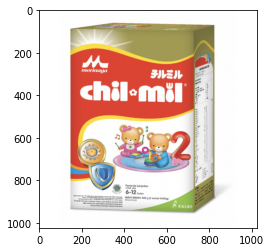

Nearest images and text related the given images are ===================
CHIL MIL 800 GR /ASIABEST


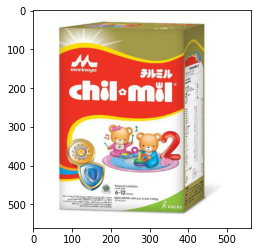

Nearest images and text related the given images are ===================
Chil Kid Gold 800gr (2x400gr) Madu/Vanilla


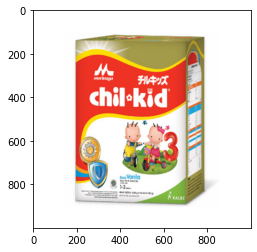

In [ ]:
print('Original image and text ====')

testing_path='/content/drive/MyDrive/Multi model search/train_images/'+nearest_images[0]
testing_text=images_text[nearest_images[0]]

print(testing_text)
img=plt.imread(testing_path)
plt.imshow(img)
plt.show()

for i in range(5):
    

    print('Nearest images and text related the given images are ===================')

    path='/content/drive/MyDrive/Multi model search/train_images/'+nearest_images[i]

    text=images_text[nearest_images[i]]
    print(text)
    print('============')
    img=plt.imread(path)
    plt.imshow(img)
    plt.show()
    

